# Homework 3

For this homework, you will be working extensively in tensorflow. It is suggested that you spin up a Google Cloud VM with a GPU attached. Remember, instructions for doing so are found in Homework 0.

### Part 1: Homework 2, but on tensorflow
### Part 2: DNN on MNIST and CIFAR10
### Part 3: VGG on MNIST and CIFAR10
### (Optional) Part 4, getting state of the art (#SOTA)


# Part 1
You don't have to repeat everything in homework 2, but rather pick one set of two features that worked well for you last homework, and implement logistic regression using tensorflow without using keras (you will practice using keras in parts 2 and 3). In other words, using tensorflow operations, please create a scalar-value loss function and let tensorflow create the training operation for logistic regression, which automatically computes the gradients and updates the weight parameters. Note that the logistic loss is a special case of the softmax cross entropy loss that you've seen when classifying MNIST.

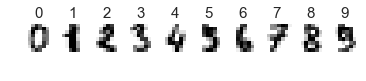

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import tensorflow as tf
sns.set(style='whitegrid', font_scale=1.25)

digits = datasets.load_digits()
for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()

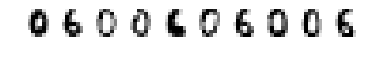

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

number_a = 0 # TODO choose your digit
number_b = 6 # TODO choose your digit

digit_a_indexes = np.where(digits.target==number_a) 
digit_b_indexes = np.where(digits.target==number_b)
targets = np.concatenate((digits.target[digit_a_indexes], digits.target[digit_b_indexes]))
images = np.concatenate((digits.images[digit_a_indexes], digits.images[digit_b_indexes]))
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()

In [3]:
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):
        '''compute_feature_a will compute ...'''
        value = np.mean(image[0:int(image.shape[0]/2),:])
        return value

    def compute_feature_b(image):
        '''compute_feature_b will compute ...'''
        value = np.mean(image[int(image.shape[0]/2):,:])
        return value
    
    return compute_feature_a(image), compute_feature_b(image)

In [4]:
def newline(weight):
    if len(weight) == 1:
        return None
    
    if len(weight) == 2:
        p1 = weight[0]
        p2 = weight[1]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = 0
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax)
            ymin = -p1/p2*(xmin)
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
        
    elif len(weight) == 3:
        p1 = weight[0]
        p2 = weight[1]
        b = weight[2]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = b/p1
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax) - b/p2
            ymin = -p1/p2*(xmin) - b/p2
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
        
    return l

In [5]:
def visualize_model(features, labels, weights=[0]):
    plt.figure(figsize=(5,5))
    X_features_a = features[np.where(labels==0)]
    X_features_b = features[np.where(labels==1)]
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "{}".format(number_a))
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "{}".format(number_b))
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    plt.ylim(features[:, 1].min(), features[:, 1].max()) 
    newline(weights)
    plt.gca().legend(loc = 1)
    return None

In [6]:
# weight variable
W = tf.Variable(tf.random.truncated_normal(shape=[2,1]))
# bias variable
b = tf.Variable(tf.random.truncated_normal(shape=[1,1]))
# data input
x = tf.placeholder(dtype=tf.float32, shape=[None, 2])
# true labels
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])
# initializer
init = tf.global_variables_initializer()
# model description
y_hat = tf.matmul(x, W) + b

In [7]:
# model parameters
#loss function
loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=y, logits=y_hat)
# learning rate
lr = 0.005
# iterations
num_iter = 500
# produce output after these iterations
out_iter = 50
batch_size = 32
# optimizer step
train_step = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [8]:
# Define the accuracy
# get predictions from raw scores
prediction = tf.round(tf.sigmoid(y_hat))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, y), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

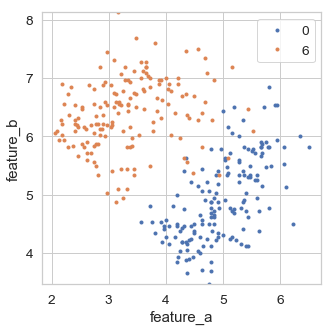

In [9]:
# extract features
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]

pseudo_y = np.copy(y_train)
pseudo_y[y_train == number_a] = 0
pseudo_y[y_train == number_b] = 1

py_test = np.copy(y_test)
py_test[y_test == number_a] = 0
py_test[y_test == number_b] = 1

visualize_model(X_features, pseudo_y)

iter:   50 train_acc: 0.504644 test_acc: 0.500000
iter:  100 train_acc: 0.959752 test_acc: 1.000000
iter:  150 train_acc: 0.950464 test_acc: 1.000000
iter:  200 train_acc: 0.950464 test_acc: 1.000000
iter:  250 train_acc: 0.959752 test_acc: 1.000000
iter:  300 train_acc: 0.962848 test_acc: 1.000000
iter:  350 train_acc: 0.956656 test_acc: 1.000000
iter:  400 train_acc: 0.962848 test_acc: 1.000000
iter:  450 train_acc: 0.959752 test_acc: 1.000000
iter:  500 train_acc: 0.962848 test_acc: 1.000000
W =  [-1.0559857  0.5704156] 
b =  [1.2894529]


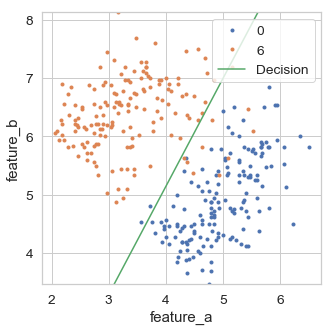

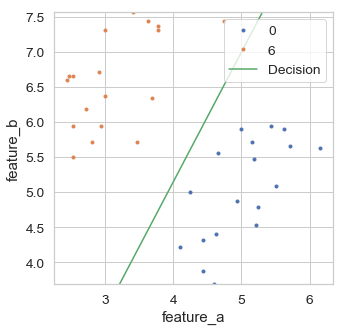

In [10]:
# start a session
# store the results
train_acc = []
test_acc = []

with tf.device('/device:GPU:0'):
    sess = tf.InteractiveSession()
    sess.run(init)
    for i in range(num_iter):
        # Use random samples from data to train
        batch_index = np.random.choice(len(X_features), size=batch_size)
        batch_train_X = X_features[batch_index]
        batch_train_y = np.matrix(pseudo_y[batch_index]).T
        sess.run(train_step, feed_dict={x: batch_train_X, y: batch_train_y})
        # calculate the accuracy
        temp_train_acc = sess.run(accuracy, feed_dict={x: X_features, y: np.matrix(pseudo_y).T})
        temp_test_acc = sess.run(accuracy, feed_dict={x: X_features_test, y: np.matrix(py_test).T})
        # store results
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        # output
        if (i + 1) % out_iter == 0:
            print('iter: {:4d} train_acc: {:5f} test_acc: {:5f}'.format(i + 1,
                                                                              temp_train_acc, temp_test_acc))
    weight = W.eval().reshape((2,))
    bias = b.eval().reshape((1,))
    print("W = ", weight, "\nb = ", bias)
    sess.close()
out = np.concatenate((weight,bias))
visualize_model(X_features, pseudo_y, out)
visualize_model(X_features_test, py_test, out)

# Part 2:  DNN on MNIST and CIFAR10

In our lab, you guys saw how to work with the MNIST dataset to perform image classification. We can attempt the MNIST classification problem with just fully connected layers. This means we will be optimizing for non-banded matrices (no convolutions).

1. Calcualte the number of weight parameters you are optimizing for 1, 2 and 3 differen fully connected layers (the total size of each layer is up to you).
2. What is the max layer depth you can go before training loss does not converge? You can usually tell that something is not converging by examining the training loss vs. iteration curve.
3. How does the number of parameters relate to the training loss and validation/test loss? Try to get a few data points to speak to this question.
3. Keeping the maximum number of parameters possible while still maintaining convergence (i.e., a good training and validation/test loss), what happens when you swap the activation function to `tanh` instead of `relu`? How about `sigmoid`?
4. After exploring the above, train a DNN model with the combination of hyperparameters that you believe will work best on MNIST.
5. Using the same architecture, try training a DNN model on more difficult dataset such as Fashion MNIST or CIFAR10/100. Example download instructions are shown in the next problem.

### Must haves
1. Make a curve of the final validation/test loss of your DNN after the loss plateaus as a function of the number of weight parameters used (final loss versus # parameters used). Note that you might see something like the curve below for a low number of parameters, but as the number of parameters increases, it will not look like this plot. 
2. On the same figure, make the same curve as above, but use different activation functions in your architecture.
3. Plot a point corresponding to your crafted DNN archiecture for question 4.
4. Repeat 1-3 for CIFAR10

The curves when reasonable # params are used look like the below
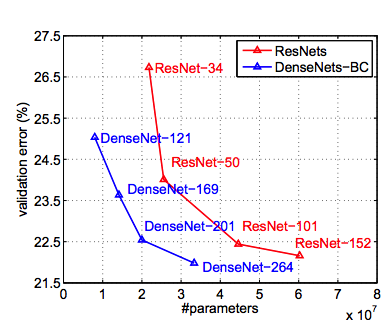

Training data shape (60000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_1203 (Dense)           (None, 100)               78500     
_________________________________________________________________
dense_1204 (Dense)           (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


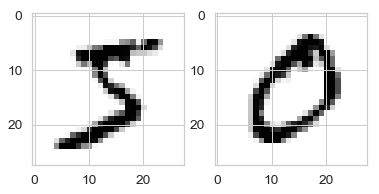

In [31]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets

import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Greys);

# Build your DNN, an example model is given for you.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    
    # Try adding more layers and graph the final loss and accuracy
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [32]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=1,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 22s 372us/step - loss: 6.2255 - acc: 0.6100 - val_loss: 5.6565 - val_acc: 0.6462


In [33]:
# create a list of models with increasing number of parameters
losses = []
vacc = []
# create a list of corresponding number of parameters
numparams = []
# activation function
act = ['relu', 'tanh', 'sigmoid']

with tf.device('/device:GPU:0'):
    for func in act:
        print("for activation ", func)
        lossperfunc = []
        numperfunc = []
        vaccperfunc = []
        for i in range(0,100,10):
            print("number of layers ", i)
            model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28, 1))])
            for j in range(i):
                model.add(tf.keras.layers.Dense(196, activation=func))
            model.add(tf.keras.layers.Dense(10, activation='softmax'))

            numperfunc.append(model.count_params())
            model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
            c = model.fit(X_train, y_train,
              batch_size=64,
              epochs=20,
              verbose=2,
              validation_data=(X_val, y_val))
            lossperfunc.append(c.history['loss'])
            vaccperfunc.append(c.history['val_acc'][-1])
        vacc.append(vaccperfunc)
        losses.append(lossperfunc)
        numparams.append(numperfunc)

for activation  relu
number of layers  0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 22s - loss: 6.9272 - acc: 0.5622 - val_loss: 4.6341 - val_acc: 0.7069
Epoch 2/20
 - 9s - loss: 4.4759 - acc: 0.7170 - val_loss: 4.2152 - val_acc: 0.7335
Epoch 3/20
 - 9s - loss: 4.2174 - acc: 0.7338 - val_loss: 4.1292 - val_acc: 0.7400
Epoch 4/20
 - 9s - loss: 4.1238 - acc: 0.7404 - val_loss: 4.0719 - val_acc: 0.7451
Epoch 5/20
 - 9s - loss: 4.0842 - acc: 0.7433 - val_loss: 4.0247 - val_acc: 0.7469
Epoch 6/20
 - 9s - loss: 4.0574 - acc: 0.7451 - val_loss: 4.0581 - val_acc: 0.7445
Epoch 7/20
 - 9s - loss: 4.0245 - acc: 0.7472 - val_loss: 4.0169 - val_acc: 0.7487
Epoch 8/20
 - 9s - loss: 4.0225 - acc: 0.7472 - val_loss: 3.9381 - val_acc: 0.7532
Epoch 9/20
 - 9s - loss: 3.9761 - acc: 0.7505 - val_loss: 4.0379 - val_acc: 0.7466
Epoch 10/20
 - 9s - loss: 3.9624 - acc: 0.7514 - val_loss: 4.0052 - val_acc: 0.7493
Epoch 11/20
 - 9s - loss: 3.9785 - acc: 0.7505 - val_loss: 3.9300 - val_acc: 

Epoch 14/20
 - 15s - loss: 0.4295 - acc: 0.8921 - val_loss: 0.4117 - val_acc: 0.9089
Epoch 15/20
 - 37s - loss: 0.3845 - acc: 0.9079 - val_loss: 0.4729 - val_acc: 0.8881
Epoch 16/20
 - 16s - loss: 0.5606 - acc: 0.8493 - val_loss: 0.4324 - val_acc: 0.9085
Epoch 17/20
 - 15s - loss: 0.6143 - acc: 0.8170 - val_loss: 0.4303 - val_acc: 0.8946
Epoch 18/20
 - 15s - loss: 0.5196 - acc: 0.8642 - val_loss: 0.5816 - val_acc: 0.8391
Epoch 19/20
 - 15s - loss: 0.6536 - acc: 0.8104 - val_loss: 0.4464 - val_acc: 0.8938
Epoch 20/20
 - 16s - loss: 0.5045 - acc: 0.8697 - val_loss: 0.5384 - val_acc: 0.8447
number of layers  50
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 33s - loss: 1.3248 - acc: 0.4682 - val_loss: 1.2016 - val_acc: 0.5644
Epoch 2/20
 - 17s - loss: 0.9626 - acc: 0.6735 - val_loss: 0.6878 - val_acc: 0.8029
Epoch 3/20
 - 17s - loss: 0.8094 - acc: 0.7225 - val_loss: 0.7035 - val_acc: 0.7524
Epoch 4/20
 - 17s - loss: 0.5907 - acc: 0.8245 - val_loss: 0.5396 - val_acc: 0.857

Epoch 7/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 8/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 9/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 10/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 11/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 12/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 13/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 14/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 15/20
 - 23s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 16/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 17/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 18/20
 - 23s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 -

number of layers  40
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 39s - loss: 1.7265 - acc: 0.3805 - val_loss: 2.3122 - val_acc: 0.1028
Epoch 2/20
 - 16s - loss: 2.3122 - acc: 0.1024 - val_loss: 2.3114 - val_acc: 0.1009
Epoch 3/20
 - 16s - loss: 2.3115 - acc: 0.1019 - val_loss: 2.3189 - val_acc: 0.1028
Epoch 4/20
 - 16s - loss: 2.3096 - acc: 0.1033 - val_loss: 2.3075 - val_acc: 0.1010
Epoch 5/20
 - 16s - loss: 2.3103 - acc: 0.1026 - val_loss: 2.3073 - val_acc: 0.1134
Epoch 6/20
 - 16s - loss: 2.3095 - acc: 0.1049 - val_loss: 2.3083 - val_acc: 0.1134
Epoch 7/20
 - 16s - loss: 2.3097 - acc: 0.1046 - val_loss: 2.3090 - val_acc: 0.1028
Epoch 8/20
 - 16s - loss: 2.3100 - acc: 0.1033 - val_loss: 2.3161 - val_acc: 0.0980
Epoch 9/20
 - 16s - loss: 2.3097 - acc: 0.1046 - val_loss: 2.3148 - val_acc: 0.1134
Epoch 10/20
 - 16s - loss: 2.3102 - acc: 0.1021 - val_loss: 2.3159 - val_acc: 0.1028
Epoch 11/20
 - 16s - loss: 2.3102 - acc: 0.1044 - val_loss: 2.3063 - val_acc: 0.1032
Epo

Epoch 14/20
 - 24s - loss: 2.3063 - acc: 0.1075 - val_loss: 2.3102 - val_acc: 0.1179
Epoch 15/20
 - 24s - loss: 2.3061 - acc: 0.1082 - val_loss: 2.3062 - val_acc: 0.1004
Epoch 16/20
 - 24s - loss: 2.3068 - acc: 0.1062 - val_loss: 2.3005 - val_acc: 0.1179
Epoch 17/20
 - 24s - loss: 2.3063 - acc: 0.1082 - val_loss: 2.2986 - val_acc: 0.1179
Epoch 18/20
 - 24s - loss: 2.3060 - acc: 0.1064 - val_loss: 2.3086 - val_acc: 0.1179
Epoch 19/20
 - 24s - loss: 2.3092 - acc: 0.1073 - val_loss: 2.3028 - val_acc: 0.1018
Epoch 20/20
 - 24s - loss: 2.3059 - acc: 0.1069 - val_loss: 2.2987 - val_acc: 0.1179
number of layers  90
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 61s - loss: 2.2790 - acc: 0.1377 - val_loss: 2.2581 - val_acc: 0.1440
Epoch 2/20
 - 27s - loss: 2.2427 - acc: 0.1503 - val_loss: 2.2261 - val_acc: 0.1593
Epoch 3/20
 - 27s - loss: 2.2700 - acc: 0.1297 - val_loss: 2.3048 - val_acc: 0.1161
Epoch 4/20
 - 27s - loss: 2.3071 - acc: 0.1076 - val_loss: 2.3038 - val_acc: 0.104

Epoch 7/20
 - 17s - loss: 2.3056 - acc: 0.1050 - val_loss: 2.3053 - val_acc: 0.1135
Epoch 8/20
 - 17s - loss: 2.3060 - acc: 0.1045 - val_loss: 2.3056 - val_acc: 0.1009
Epoch 9/20
 - 17s - loss: 2.3055 - acc: 0.1054 - val_loss: 2.3029 - val_acc: 0.1010
Epoch 10/20
 - 17s - loss: 2.3056 - acc: 0.1052 - val_loss: 2.3053 - val_acc: 0.1135
Epoch 11/20
 - 17s - loss: 2.3043 - acc: 0.1064 - val_loss: 2.3088 - val_acc: 0.0958
Epoch 12/20
 - 17s - loss: 2.3041 - acc: 0.1081 - val_loss: 2.3040 - val_acc: 0.1135
Epoch 13/20
 - 17s - loss: 2.3043 - acc: 0.1047 - val_loss: 2.3015 - val_acc: 0.1135
Epoch 14/20
 - 17s - loss: 2.3027 - acc: 0.1094 - val_loss: 2.3021 - val_acc: 0.1135
Epoch 15/20
 - 17s - loss: 2.3017 - acc: 0.1118 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 16/20
 - 17s - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 17/20
 - 17s - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 18/20
 - 17s - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3012 -

number of layers  80
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 110s - loss: 2.3102 - acc: 0.1036 - val_loss: 2.3039 - val_acc: 0.1135
Epoch 2/20
 - 52s - loss: 2.3064 - acc: 0.1044 - val_loss: 2.3043 - val_acc: 0.1009
Epoch 3/20
 - 28s - loss: 2.3059 - acc: 0.1055 - val_loss: 2.3056 - val_acc: 0.1135
Epoch 4/20
 - 28s - loss: 2.3060 - acc: 0.1055 - val_loss: 2.3052 - val_acc: 0.1135
Epoch 5/20
 - 28s - loss: 2.3059 - acc: 0.1053 - val_loss: 2.3109 - val_acc: 0.1010
Epoch 6/20
 - 28s - loss: 2.3057 - acc: 0.1048 - val_loss: 2.3090 - val_acc: 0.1010
Epoch 7/20
 - 28s - loss: 2.3060 - acc: 0.1039 - val_loss: 2.3096 - val_acc: 0.1010
Epoch 8/20
 - 28s - loss: 2.3058 - acc: 0.1059 - val_loss: 2.3095 - val_acc: 0.1135
Epoch 9/20
 - 28s - loss: 2.3058 - acc: 0.1069 - val_loss: 2.3060 - val_acc: 0.1135
Epoch 10/20
 - 28s - loss: 2.3058 - acc: 0.1043 - val_loss: 2.3022 - val_acc: 0.1135
Epoch 11/20
 - 28s - loss: 2.3049 - acc: 0.1054 - val_loss: 2.3052 - val_acc: 0.1028
Ep

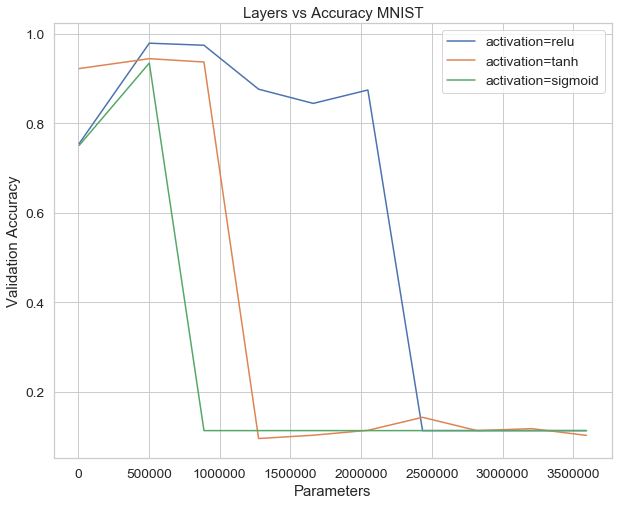

In [34]:
plt.figure(figsize=(10,8))
for i in range(3):
    plt.plot(numparams[i], vacc[i], label="activation={}".format(act[i]))
plt.xlabel("Parameters")
plt.ylabel("Validation Accuracy")
plt.title("Layers vs Accuracy MNIST")
plt.legend()
plt.show()

In [41]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

In [42]:
# create a list of models with increasing number of parameters
losses = []
vacc = []
# create a list of corresponding number of parameters
numparams = []
# activation function
act = ['relu', 'tanh', 'sigmoid']

with tf.device('/device:GPU:0'):
    for func in act:
        print("for activation ", func)
        lossperfunc = []
        numperfunc = []
        vaccperfunc = []
        for i in range(0,80,10):
            print("number of layers ", i)
            model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(32, 32, 3))])
            for j in range(i):
                model.add(tf.keras.layers.Dense(256*3, activation=func))
            model.add(tf.keras.layers.Dense(10, activation='softmax'))
            numperfunc.append(model.count_params())
            model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
            early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3)
            c = model.fit(X_train, y_train,
                  batch_size=64,
                  epochs=20,
                  verbose=2,
                  validation_data=(X_val, y_val),
                  callbacks=[early_stop])
        vacc.append(vaccperfunc)
        losses.append(lossperfunc)
        numparams.append(numperfunc)

for activation  relu
number of layers  0
Train on 50000 samples, validate on 10000 samples
Epoch 1/20


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,8))
for i in range(3):
    plt.plot(numparams[i], vacc[i], label="activation={}".format(act[i]))
plt.xlabel("Parameters")
plt.ylabel("Validation Accuracy")
plt.title("Layers vs Accuracy CIFAR10")
plt.legend()
plt.show()

# Part 3. VGG on CIFAR100 and CIFAR10

VGG is a simple, but powerful CNN created in 2015. Read the VGG paper here: https://arxiv.org/pdf/1409.1556.pdf

Here, we're going to try to reproduce the model's findings on the cifar10 and cifar100 dataset. Note that the paper takes 224 x 224 images, but cifar10 and 100 are only 32 x 32 images.

1. Implement all of the layers for the VGG ConvNet Configuration A. Please use the shell code below as guide. Then, train this network on the Cifar10 and Cifar100 datasets.
2. For Cifar10 and 100, VGG is probably overkill. Try changing the number of layers and number of filters without sacrificing too much performance accuracy. How many filters can you get rid of before you see the accuracy drop by more than 2%? Where in the architecture is it better to remove filters - towards the input layers, or more towards the output layers?
3. For what you experiment with--report the parameter, validation loss curves for changing the number of i) layers, ii) filter size, iii) both.

### CIFAR 10

Training data shape (50000, 32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4

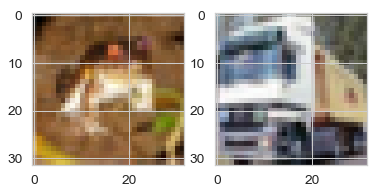

In [43]:
# This is the same model in the other notebook, looks very simplified.
import tensorflow as tf

(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));

# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [ ]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

#### Remove Conv Layers at the top

In [44]:
# Remove a conv layer at the top
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20


KeyboardInterrupt: 

In [ ]:
# Remove another conv layer at the top with its max pooling
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

In [40]:
# Remove another conv layer at the top
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20


ResourceExhaustedError: OOM when allocating tensor of shape [3,3,256,256] and type float
	 [[node conv2d_11/kernel/Adam/Initializer/zeros (defined at <ipython-input-40-67b1e92cfacd>:34)  = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [3,3,256,256] values: [[[0 0 0...]]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'conv2d_11/kernel/Adam/Initializer/zeros', defined at:
  File "E:\Miniconda3\envs\tflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Miniconda3\envs\tflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "E:\Miniconda3\envs\tflow\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "E:\Miniconda3\envs\tflow\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "E:\Miniconda3\envs\tflow\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-67b1e92cfacd>", line 34, in <module>
    callbacks=[early_stop])
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1639, in fit
    validation_steps=validation_steps)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\engine\training_arrays.py", line 86, in fit_loop
    model._make_train_function()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 700, in _make_train_function
    params=self._collected_trainable_weights, loss=self.total_loss)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\optimizers.py", line 734, in get_updates
    grads, global_step=self.iterations)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\optimizer.py", line 593, in apply_gradients
    self._create_slots(var_list)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\adam.py", line 135, in _create_slots
    self._zeros_slot(v, "m", self._name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\optimizer.py", line 1139, in _zeros_slot
    new_slot_variable = slot_creator.create_zeros_slot(var, op_name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\slot_creator.py", line 183, in create_zeros_slot
    colocate_with_primary=colocate_with_primary)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\slot_creator.py", line 157, in create_slot_with_initializer
    dtype)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\slot_creator.py", line 65, in _create_slot_var
    validate_shape=validate_shape)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1487, in get_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1237, in get_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 540, in get_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 492, in _true_getter
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 922, in _get_single_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 183, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 146, in _variable_v1_call
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 125, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2437, in default_variable_creator
    import_scope=import_scope)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 187, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 297, in __init__
    constraint=constraint)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 409, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 896, in <lambda>
    shape.as_list(), dtype=dtype, partition_info=partition_info)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\init_ops.py", line 101, in __call__
    return array_ops.zeros(shape, dtype)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1563, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2979, in fill
    "Fill", dims=dims, value=value, name=name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [3,3,256,256] and type float
	 [[node conv2d_11/kernel/Adam/Initializer/zeros (defined at <ipython-input-40-67b1e92cfacd>:34)  = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [3,3,256,256] values: [[[0 0 0...]]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


#### Remove Bottom layers

In [45]:
model = tf.keras.Sequential([
    # remove a layer at the bottom alongside its max pooling
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20


ResourceExhaustedError: OOM when allocating tensor of shape [3,3,256,256] and type float
	 [[node conv2d_24/kernel/Adam/Initializer/zeros (defined at <ipython-input-44-d0e356db3a8e>:38)  = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [3,3,256,256] values: [[[0 0 0...]]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'conv2d_24/kernel/Adam/Initializer/zeros', defined at:
  File "E:\Miniconda3\envs\tflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Miniconda3\envs\tflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "E:\Miniconda3\envs\tflow\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "E:\Miniconda3\envs\tflow\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "E:\Miniconda3\envs\tflow\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "E:\Miniconda3\envs\tflow\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-d0e356db3a8e>", line 38, in <module>
    callbacks=[early_stop])
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1639, in fit
    validation_steps=validation_steps)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\engine\training_arrays.py", line 86, in fit_loop
    model._make_train_function()
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 700, in _make_train_function
    params=self._collected_trainable_weights, loss=self.total_loss)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\optimizers.py", line 734, in get_updates
    grads, global_step=self.iterations)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\optimizer.py", line 593, in apply_gradients
    self._create_slots(var_list)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\adam.py", line 135, in _create_slots
    self._zeros_slot(v, "m", self._name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\optimizer.py", line 1139, in _zeros_slot
    new_slot_variable = slot_creator.create_zeros_slot(var, op_name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\slot_creator.py", line 183, in create_zeros_slot
    colocate_with_primary=colocate_with_primary)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\slot_creator.py", line 157, in create_slot_with_initializer
    dtype)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\training\slot_creator.py", line 65, in _create_slot_var
    validate_shape=validate_shape)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1487, in get_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1237, in get_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 540, in get_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 492, in _true_getter
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 922, in _get_single_variable
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 183, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 146, in _variable_v1_call
    aggregation=aggregation)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 125, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2437, in default_variable_creator
    import_scope=import_scope)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variables.py", line 187, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 297, in __init__
    constraint=constraint)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 409, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 896, in <lambda>
    shape.as_list(), dtype=dtype, partition_info=partition_info)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\init_ops.py", line 101, in __call__
    return array_ops.zeros(shape, dtype)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1563, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2979, in fill
    "Fill", dims=dims, value=value, name=name)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "E:\Miniconda3\envs\tflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [3,3,256,256] and type float
	 [[node conv2d_24/kernel/Adam/Initializer/zeros (defined at <ipython-input-44-d0e356db3a8e>:38)  = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [3,3,256,256] values: [[[0 0 0...]]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [ ]:
model = tf.keras.Sequential([
    # remove a layer at the bottom alongside its max pooling
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

#### Change filter size

In [ ]:
# Half the filters in the top layer
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

In [ ]:
# Half the filters in second top layer
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/device:GPU:0'):
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val))
model.summary()

In [ ]:
# Half the filters in bottom layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

In [ ]:
# Half the filters in all layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3)
    c = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=2,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])
model.summary()

# (Optional) Part 4, state of the art

Currently, state of the art implementations in the image classification problem are DenseNet: (https://arxiv.org/abs/1608.06993), ResNet (https://arxiv.org/abs/1512.03385), and ResNext (https://arxiv.org/pdf/1611.05431.pdf). Try implementing and training one of these on the cifar10 and cifar100 dataset. Feel free to experiment.

Jargon to learn about
1. What is "residual learning"?
2. What is a "bottleneck layer"?
3. What is a "dense block"?